# **Wind Power Project **



Import packages

In [ ]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 899 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=5476a7095302a02c988d7e575e69e48dcd8d5af48aa7cb65c44884c6c61b6bfc
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz


In [ ]:
import pandas as pd
import numpy as np
from easydict import EasyDict as edict
# https://www.kaggle.com/datasets/theforcecoder/wind-power-forecasting
import matplotlib.pyplot as plt
import fastai
from dtreeviz.trees import *
#from treeinterpreter import treeinterpreter
#from waterfall_chart import plot as waterfall

# from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
from sklearn.impute import SimpleImputer


from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.multioutput import MultiOutputRegressor
from IPython.display import Image, display_svg, SVG

In [ ]:
%matplotlib inline
#%matplotlib notebook
#%matplotlib ipympl

In [ ]:
np.random.seed(2022)
plt.ion()

In [ ]:
url = 'https://drive.google.com/uc?id=15LgFZp0GZbobuIfpuWvTm8_VB3ML9Vnq'
wind_data = pd.read_csv(url,low_memory=False)
display(wind_data.head())
target, features = wind_data.columns[1], wind_data.columns[2:]

,Unnamed: 0,ActivePower,AmbientTemperatue,BearingShaftTemperature,Blade1PitchAngle,Blade2PitchAngle,Blade3PitchAngle,ControlBoxTemperature,GearboxBearingTemperature,GearboxOilTemperature,...,GeneratorWinding2Temperature,HubTemperature,MainBoxTemperature,NacellePosition,ReactivePower,RotorRPM,TurbineStatus,WTG,WindDirection,WindSpeed
0,2017-12-31 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
1,2017-12-31 00:10:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
2,2017-12-31 00:20:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
3,2017-12-31 00:30:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN
4,2017-12-31 00:40:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G01,NaN,NaN


In [ ]:
# which columns will be used for predictions, indepent varaibles that are given
X = wind_data[features]
y = wind_data[target]

In [ ]:
X['WindSpeed3'] = X['WindSpeed']**3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
I = y.notnull()
X, y = X[I], y[I] # takes care of the missing values

# get rid of any indices for simplicity
X, y = X.reset_index(drop=True), y.values

# Split dataset into train and test -- also has random number generator
# Did not initialize that will give different data everytime you run it
# determinants
# Sort the data in increasing order by time stamp

# find the numeric and non-numeric features
columns1, columns2 = X.select_dtypes(include=['number', ]).columns.tolist(), \
                     X.select_dtypes(exclude=['number', ]).columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)


In [ ]:
display(columns1)

['AmbientTemperatue',
 'BearingShaftTemperature',
 'Blade1PitchAngle',
 'Blade2PitchAngle',
 'Blade3PitchAngle',
 'ControlBoxTemperature',
 'GearboxBearingTemperature',
 'GearboxOilTemperature',
 'GeneratorRPM',
 'GeneratorWinding1Temperature',
 'GeneratorWinding2Temperature',
 'HubTemperature',
 'MainBoxTemperature',
 'NacellePosition',
 'ReactivePower',
 'RotorRPM',
 'TurbineStatus',
 'WindDirection',
 'WindSpeed',
 'WindSpeed3']

In [ ]:
if len(columns1):
    my_imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    my_imputer.fit(X_train[columns1])  # training imputer
    X_train[columns1] = my_imputer.transform(X_train[columns1])  # imputing the training data
    X_valid[columns1] = my_imputer.transform(X_valid[columns1])  # imputing the validation data
    X_test[columns1] = my_imputer.transform(X_test[columns1])  # imputing the test data

# use most-frequest imputation strategy for non-numeric features
if len(columns2):
    my_imputer2 = SimpleImputer(strategy='most_frequent')
    my_imputer2.fit(X_train[columns2])  # training imputer
    X_train[columns2] = my_imputer2.transform(X_train[columns2])  # imputing the training data
    X_valid[columns2] = my_imputer2.transform(X_valid[columns2])  # imputing the validation data
    X_test[columns2] = my_imputer2.transform(X_test[columns2])  # imputing the test data

# use only the numeric features
# non-numeric feaures need to be handled via an embedding into numeric features

features = columns1

In [ ]:
estimators = {
    'tree': DecisionTreeRegressor(max_depth=8, max_leaf_nodes=64, min_samples_leaf=30),
    'knn': KNeighborsRegressor(n_neighbors=5),
    'rf': RandomForestRegressor(max_depth=2, verbose=2),
    'gbr': GradientBoostingRegressor(max_depth=2, verbose=2),
    'xrf': ExtraTreesRegressor(max_depth=8, verbose=2, max_leaf_nodes=64, min_samples_leaf=30),
    #'mor': MultiOutputRegressor(max_depth=8)
}
est_key = 'xrf'
est = estimators[est_key]

In [ ]:
est.fit(X_train[features], y_train)

# fit the regressor to the training data
y_pred = est.predict(X_valid[features])  # make predictions on the validation data

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


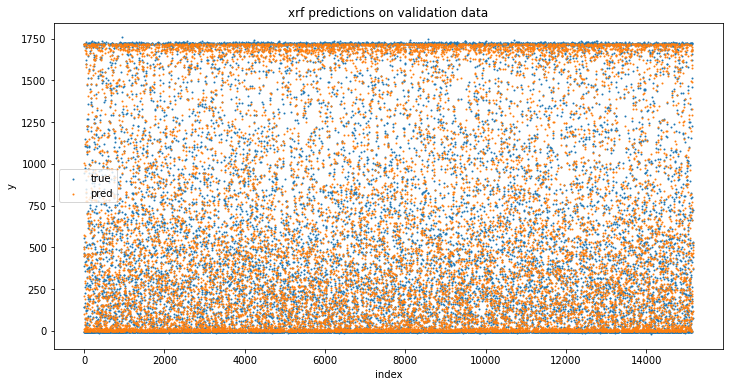

In [ ]:
fig = plt.figure(figsize = (12,6))
#plt.figure()
I = np.arange(len(y_valid))
plt.scatter(I, y_valid, s=1, label='true')
plt.scatter(I, y_pred, s=1, label='pred')
plt.ylabel('y')
plt.xlabel('index')
plt.legend()
plt.title(f'{est_key} predictions on validation data')
plt.show()

xrf        validation rmse=61.76	mae=31.56	mdae=18.22


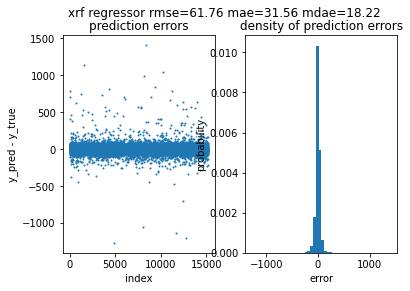

done


In [ ]:
est_perf = edict(rmse=np.sqrt(mean_squared_error(y_valid, y_pred)),
                 mae=mean_absolute_error(y_valid, y_pred),
                 mdae=median_absolute_error(y_valid, y_pred))

msg = [f'{k}={v:.2f}' for k, v in est_perf.items()]
tab = "\t"
print(f'{est_key:10s} validation {tab.join(msg)}')
# plot of the errors
# x axis -- y_valid
# lowest to highest power
# plt.plot(x=y_valid, y=y_pred-y_valid)
# S = np.argsort(y_valid)

e = y_pred - y_valid
fig, axs = plt.subplots(nrows=1, ncols=2)
axs[0].scatter(np.arange(len(e)), e, s=1)
axs[0].set_title(f'prediction errors')
axs[0].set_ylabel('y_pred - y_true')
axs[0].set_xlabel('index')
axs[1].hist(e, bins=50, density=True)  # to see if this bell curve has the normal distribution
axs[1].set_xlabel('error')
axs[1].set_ylabel('probability')
axs[1].set_title(f'density of prediction errors')
fig.suptitle(f'{est_key} regressor {" ".join(msg)}')

plt.show()
plt.pause(1) # to see if it is not showing
print('done')

In [ ]:
type(est),type(X_train), type(y_train),pd.Series(y_train)

(sklearn.ensemble._forest.ExtraTreesRegressor,
 pandas.core.frame.DataFrame,
 numpy.ndarray,
 0          77.293137
 1         963.334728
 2         472.741933
 3          23.893015
 4         287.826428
             ...     
 60635    1715.256825
 60636      73.182010
 60637      21.565532
 60638    1687.689450
 60639      -7.571867
 Length: 60640, dtype: float64)

In [ ]:
x_data=X_train[features][:1000].values
y_data=pd.Series(y_train[:1000]).values

In [ ]:
type(features)

list

In [ ]:
type(x_data), type(y_data)

(numpy.ndarray, numpy.ndarray)

In [ ]:
est.fit(x_data, y_data)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
b

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


ExtraTreesRegressor(max_depth=8, max_leaf_nodes=64, min_samples_leaf=30,
                    verbose=2)

In [ ]:
# Try to make the tree using dtreeviz
viz = dtreeviz(est, 
               x_data,
               y_data,
               target_name = target, 
               feature_names=features,
               fontname="DejaVu Sans",
               title_fontsize=16,
               colors = {"title":"purple"})
               #target_name=target,
               #feature_names=features)
#viz = dtreeviz(est, X_train.,feature_names=features,target_name=target,
               #fontname='DejaVu Sans', scale=1.6, label_fontsize=10, orientation='LR', X=X_valid)
viz
# will memorize, but not evaluate

ValueError: ignored

https://en.wikipedia.org/wiki/Betz%27s_law
